# Exploring and modifying Datasets
## Using pandas, NumPy and matplotlib

## The dataset
**Fake and Real News**

*Source: https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset*

This dataset contains 2 `csv` files: `True` which has a collection of real news, and `Fake` which has a collection of fake news. Both files have the following data attributes:

- `title`: the title of the article
- `text`: the text/body of the article
- `subject`: the class of subject of the article
- `date`: the date on which the article was published

In [6]:
#importing used libraries
import csv
import re
import pandas as pd
from functools import reduce
import numpy as np
import calendar
import string
import matplotlib.pyplot as plt

import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns


# this aux function reads the CSV file and returns the data in a Python dictionary
def get_data_csv(path):
    collection = []
    with open(path, 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
        
# the data    
real = get_data_csv('True.csv')
fake = get_data_csv('Fake.csv')


In [7]:
df_real = pd.DataFrame(real)
df_real

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [8]:
df_fake = pd.DataFrame(fake)
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


## Part 1 - Exploratory Analysis

*Pre-processing the dataset*

Usually, we need to perform some processing with the data in order to further explore it. In our case, it could be more convenient if we had both fake and real news in the the same dataframe.

We can also make sure that the values of columns are as expected.

Furthermore, usually when we are working with text data, we need to perform data cleaning, which means remove weird characters, or repetitive words, or unnatural words such as mentions (@someone) and hashtags. 

### TASK 1 - Merging the news

Create a new column `fake` in both dataframes, where it has the value `1` in the `df_fake` and the value `0` in the `df_real`. Then, `merge` both dataframes, save the merged dataframe into `df`.

- Display the `.count()` for each dataframe to verify the merge worked.

In [ ]:
df_real['fake'] = 0
df_fake['fake'] = 1
df = df_real.merge(df_fake, 'outer')
print(df_real.count())
print(df_fake.count())
df.count()

title      21417
text       21417
subject    21417
date       21417
fake       21417
dtype: int64
title      23481
text       23481
subject    23481
date       23481
fake       23481
dtype: int64


title      44898
text       44898
subject    44898
date       44898
fake       44898
dtype: int64

### TASK 2 - Cleaning `date`

1. Perform data cleaning on the `date` column of `df`. You should use `pandas.to_datetime` function to convert the `date` column into `datetime` type of data.

2. Filter the rows that failed the conversion. You can use `.isna()` to verfiy it.

3. After the conversion, you should remove the rows that failed the conversion (are not valid dates). You can use `dropna()`.

4. Now, to simplify the `date` data, we can keep only month and year, for example `2017-12`.

`df` now has a clean `date` column.


In [ ]:
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')
df

,title,text,subject,date,fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,0
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,2016-01-16,1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,2016-01-16,1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,2016-01-15,1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,2016-01-14,1


In [ ]:
df.isna()

,title,text,subject,date,fake
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
44893,False,False,False,False,False
44894,False,False,False,False,False
44895,False,False,False,False,False
44896,False,False,False,False,False


In [ ]:
df.dropna(inplace = True)

In [ ]:
df['date'] = df['date'].dt.strftime("%Y-%m")
df

,title,text,subject,date,fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12,0
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,2016-01,1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,2016-01,1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,2016-01,1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,2016-01,1


### TASK 3 - Removing duplicates

Remove any duplicate data rows from `df` this will ensure each news is unique. You can use `drop_duplicates()`. 

- How many duplicates there were in `df`?

In [ ]:
print(df.count())
df.drop_duplicates(inplace = True)
df.count()


title      44888
text       44888
subject    44888
date       44888
fake       44888
dtype: int64


title      44675
text       44675
subject    44675
date       44675
fake       44675
dtype: int64

### TASK 4 - Expanding `date`

It could be helpful to analyze the data using more granular dates. To achieve that we will expand the `date` into more columns such as `month` and `year`.

1. Create a new column `month` in `df` to store the month's name, for example, "Jan" for month 01.

2. Create a new column `year` in `df` to store the year, for example, "2016" for "2016-12".

You can use the code below to figure out the number of articles per month:

```
df['date'].dt.to_period('M').value_counts()
```

And, you can use `calendar.month_abbr[1]` (returns `"Jan"`) to figure out the month's name.

In [ ]:
def returnMonths(x):
    return calendar.month_abbr[int(x[5:])]

def returnYears(x):
    return x[:4]
    
df['month'] = df['date'].apply(returnMonths)
df['year'] = df['date'].apply(returnYears)
df

,title,text,subject,date,fake,month,year
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12,0,Dec,2017
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12,0,Dec,2017
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12,0,Dec,2017
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12,0,Dec,2017
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12,0,Dec,2017
...,...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,2016-01,1,Jan,2016
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,2016-01,1,Jan,2016
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,2016-01,1,Jan,2016
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,2016-01,1,Jan,2016


### TASK 5 - Pivot Table

Use `pd.pivot_table` to summarize the number of articles per year (columns) and month (rows), save this pivot table in `df_pivot`.

> Ref: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

Use `.reindex` to save `df_pivot` with the index rows ordered by the months. You can use the list below when reindexing it:
```
ord_month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']
```


In [ ]:
df_table = pd.pivot_table(df, index = ['month'], values = ['title'], columns = ['year'],  aggfunc = len, fill_value = 0)
df_table = df_table.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec'])
df_table

title                 
year   2015  2016  2017 2018
month                       
Jan       0  1325  1779    0
Feb       0  1448  1468   35
Mar       8  1577  1744    0
Apr     325  1360  1333    0
May     338  1406  1331    0
Jun     236  1289  1369    0
Jul     291  1220  1315    0
Aug     220  1156  1446    0
Sep     202  1286  3697    0
Oct     281  1416  3762    0
Nov     275  1639  3604    0
Dec     301  1330  2863    0

### TASK 6 - Plotting articles per month and year

Using your pivot table `df_pivot`, plot a chart that shows the distribution (Num. articles - y-axis) of articles published per month (x-axis) and year. The image below shows you what your chart should look like:

![title](monthyear_pv.png)

- Describe the distibution and insights observed on the graph.

<AxesSubplot:title={'center':'Articles published per month and year'}, xlabel='Months', ylabel='Num-Articles'>

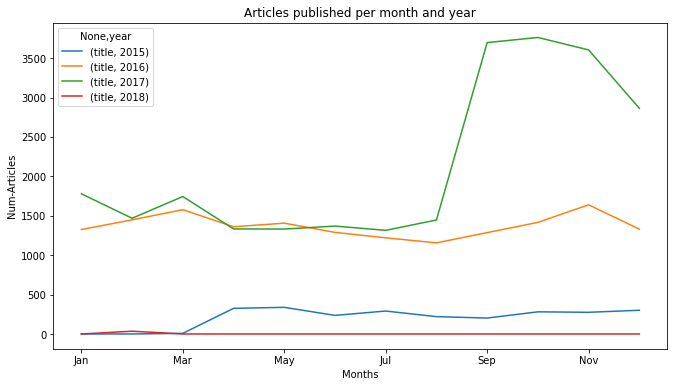

In [ ]:
df_table.plot(xlabel = 'Months', ylabel = 'Num-Articles', title = 'Articles published per month and year', figsize =(11,6))


#if you can figure out how to get rid of the 'None' as well as the 'title, ' within the legend, that would be great

Describe the distibution and insights observed on the graph.

The distribution shows the trend in the number of articles published across the span of a year. Towards Q4 of the year is when the number of articles started to increase, especially in 2016 and 2017, two years which have more than double the number of articles than 2015 and 2018 for the entire year, with 2017 more than 7x them in Q4.

### TASK 7 - Title length between fake and real articles

Calculate the number of words in `title`, save those results in newly created columns `lentitle`. You should use `apply` to calculate this.

Display a distribution of $length \times count$ using different colors to distanguish fake/real distrubutions in a chart.

- Describe the distibution and insights observed on the graph.

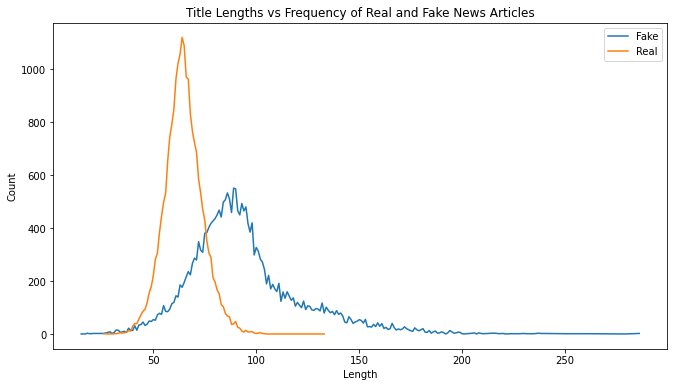

In [ ]:
#Your solution
df['lentitle'] = df['title'].apply(len)

fakeLength = (df[df["fake"] == 1])
fakeLength = (fakeLength['lentitle'].value_counts()).to_frame()
fakeLength = fakeLength.sort_index()

realLength = (df[df["fake"] == 0])
realLength = (realLength['lentitle'].value_counts()).to_frame()
realLength = realLength.sort_index()


ax = fakeLength.plot(xlabel = 'Length', ylabel = 'Count', title = 'Title Lengths vs Frequency of Real and Fake News Articles', figsize =(11,6))
realLength.plot(ax=ax)
ax.legend(["Fake", "Real"]);

Describe the distribution and insights observed on the graph:

The distribution shows two bell curves for real and fake article-length counts. We can observe the mean, median and mode from the top of the curve as well as where lengths tend to skew in terms of count. We can also visually see the standard deviation of the distribution of lengths for both fake and real article-length counts. 

The distribution indicates a clear correlation between the lengths of articles that are fake and those that are real. Real articles average title lengths around 1200 whereas fake articles average title lengths around 550. We can takeaway from this that fake news article writers tend to make much longer titles, potentially to "sell" the article better and get people to click on it as well as show up in a broader amount of searches by hitting various terms, keywords/buzzwords, trending topics, etc. and improve their SEO.  


### TASK 8 - Subject Analysis

After running the given `count_plot` function, answer the following questions:

- Which subjects have the most real/fake articles?

- What can you infer about the subject `politics news` regarding their class and publication dates? 

- What can you infer about the subject `news` regarding their class and publication dates? 

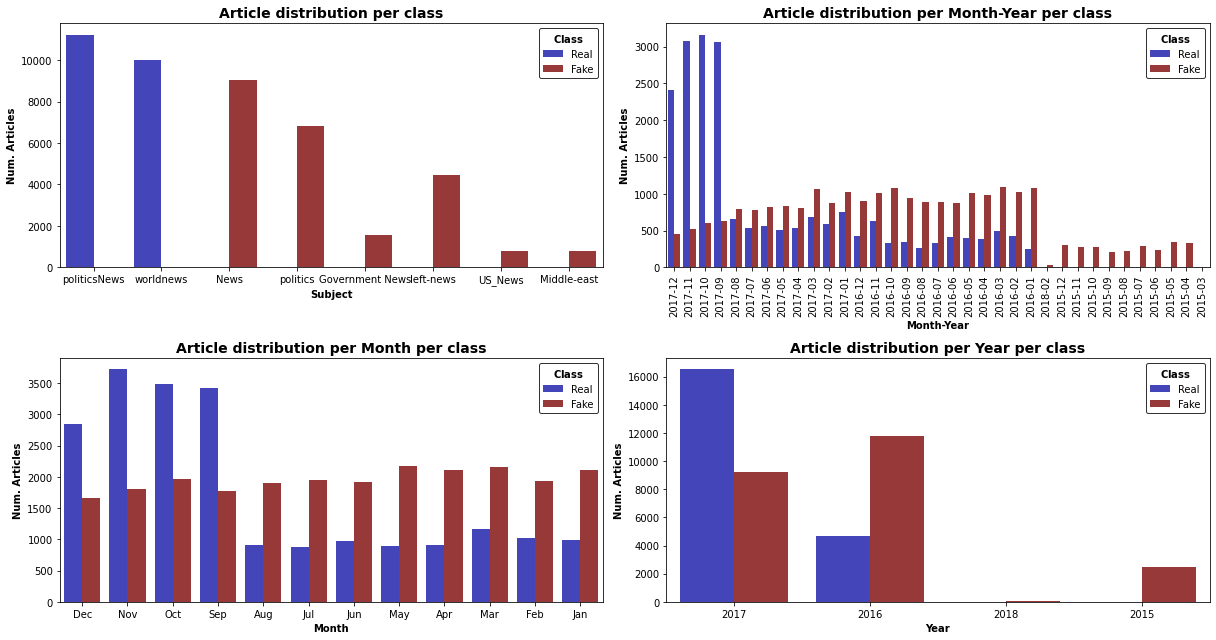

In [ ]:
features = ['subject', 'date', 'month', 'year']

def count_plot(df, columns):
    plt.figure(figsize = (17, 9))
    for indx, var in enumerate(columns):
        # Creating the chart
        plt.subplot(2, 2, (indx + 1))
        c = sns.countplot(x = var, hue = df['fake'], data = df, palette = ['#3232CD','#A62A2A'])

        # Formatting the legend
        leg = plt.legend(('Real', 'Fake'), loc = 'upper right', bbox_to_anchor = (1.0, 1.0), 
                         title = "$\\bf{Class}$")
        # Legend's border - color
        leg.get_frame().set_edgecolor('k')

        # Setting titles, labels, and axis for each chart
        if indx == 0:
            plt.title('Article distribution per class', weight = 'bold', size = 14)
            plt.xlabel('Subject', weight = 'bold', size = 10)
            plt.ylabel('Num. Articles', weight = 'bold', size = 10)
        elif indx == 1:
            plt.title('Article distribution per Month-Year per class', weight = 'bold', size = 14)
            plt.xlabel('Month-Year', weight = 'bold', size = 10)
            plt.ylabel('Num. Articles', weight = 'bold', size = 10)
            plt.xticks(np.arange(len(df['date'].unique())), df['date'].unique());
            c.set_xticklabels(c.get_xticklabels(), rotation = 90);
        elif indx == 2:
            plt.title('Article distribution per Month per class', weight = 'bold', size = 14)
            plt.xlabel('Month', weight = 'bold', size = 10)
            plt.ylabel('Num. Articles', weight = 'bold', size = 10)
        else:
            plt.title('Article distribution per Year per class', weight = 'bold', size = 14)
            plt.xlabel('Year', weight = 'bold', size = 10)
            plt.ylabel('Num. Articles', weight = 'bold', size = 10)

    plt.tight_layout()

count_plot(df, features)

Which subjects have the most real/fake articles?



Politics News have the most real articles while general News has the most fake articles 

Politics news began to have thousands of articles published in Q4 of 2017. Before 2017 the number of articles was significantly less, by around a factor of 6. In Q4 of 2017, articles started to be published 7x the previous amounts. Possible explanations for this can be that a lot of political events in the U.S. started to take place, especially with Donald Trump in office. Events like NFL players kneeling during the national anthem were massive and launched significant political discourse, which shows in the data. Both real news began to increase significantly in 2016 when the election took place, and in 2017 with events like NFL kneeling, Donald Trump causing controversy, the Russia Investigation, White House administration issues, international tensions, vegas shooting, travel ban, fake news, etc. which again correlate with what the data shows.




What can you infer about the subject news regarding their class and publication dates?

News articles never exploded in quantity but did have a peaking moment in 2016 to the start of 2017. This could be due to the tremendous activity around the U.S. Election and everything to do with it which would take up the bulk of news events in 2016 and 2017. With Donald Trump running for president, as well as an unprecedented talk on fake news, a lot of fake news itself began to be published, which can be an explaining factor in this rise of fake articles regarding the news. We can see in 2016, fake news was massive, surrounding the time of the U.S. election, and decreased slightly in 2017 whereas real news exploded in count as more actual political events were happening which real news could be published on.  

## Part 2 - Cleaning the text

*Pre-processing the text*

It's very common to clean your text before you start running analysis of the words distribution. Usually, we first look through the original format of the data and identify what types of token/words could be harmful for the analysis. However, in this assignment, you will be already given the specific issues of the dataset, so your job it to performing the cleaning.

The most common way to remove those tokes, it to create regular expressions using `re.sub`.

> https://docs.python.org/3/library/re.html

Before you start, take a look at a few of the article's text as a base and try to identify words or text format that might create issues:


In [ ]:
df['text'][0]

'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educat

In [ ]:
df['text'][40000]

'A shocking new video has just been released by the Center for Medical Progress, the undercover investigative group that in 2015 released videos showing that Planned Parenthood affiliates have profited from selling the body parts of aborted babies.This latest video is a preview of footage that CMP investigators gathered at the 2014 and 2015 National Abortion Federation conventions, attended by hundreds of members of the abortion industry each year. (The NAF is a major trade group of North American abortion providers, and Planned Parenthood makes up about 50 percent of its members and leadership.)Notice the audience laughing at some of the most vile comments you have ever heard about the killing and dismembering of babies in the womb:https://youtu.be/Sq1ycCmX3uUHere are some of the most horrifying remarks from the brand-new undercover footage. Attendees made some of these comments during official presentations, and others directly to undercover CMP investigators.Dr. Lisa Harris, the med

Some words or formatting that can cause issues include: URLs, multiple spacing, punctuation, numbers or symbols, the difference in upper or lower cases, etc.

### TASK 9 - Text normalization

It's very common to normalize the characters to either all upper or lower case, this makes it easier to work with regular expressions. In our case, you will use the `apply` function to transform the `df`'s column `text` into all lower case characters.

Then, we will also get rid of the monetary symbol (`\$`) and numeric digits using the `apply` function.

In [ ]:
# Your solution
df_copy = df.copy

df["text"] = df["text"].apply(lambda x:x.lower())
df["text"] = df["text"].apply(lambda x:re.sub("\$|[0-9]", "", x))

### TASK 10 - Removing online and dataset-specific content

When we work with text that was extracted from the internet, it's common to have URLs, @mentions, hashtags, etc. Our dataset also presents those tokens. Using `apply` remove all the following content from the column `text` of `df`:

- Remove the hastags (e.g., `#`)

- Remove the mentions including the username with it (e.g., `@realdonaldtrump`)

- Remove URLS and space (`\xa0`), URLS:
    - space (`\xa0`)
    - `(bit.ly/ ) (bit.ly/ )` becomes ` (  ) (  ) `
    - `(  december  ,  .twitter.com/ymsobljfxu` becomes `(  december  ,  `
    - ` pic.twitter.com/ulcfddhkdy` becomes `  `
    - general URLS (e.g. `https://t.co/`): for general URLs you can use the regular expression `'https?://\S+|www\.\S+'`

- Another unsual token is the word "reuters", even though it is a good indication to find `real` articles, it can make it too obvious. So, also remove `reuters`.

- Remove punctuations, use `string.punctuations` combined with the `apply` function to achieve that.

- You will note that, after removing these token, you will be left with many multiples spaces. Use the regular expression `' +'` to remove extra spaces.





In [ ]:
# Your solution
df["text"] = df["text"].apply(lambda x:re.sub("@[a-zA-Z0-9]+|#|(https?:\/\/\S+|www\.\S+)|reuters|([a-zA-Z0-9]*\.[a-zA-Z0-9]+\/*[a-zA-Z0-9]*)", "", x))
df["text"] = df["text"].apply(lambda x:re.sub("[%s]" % re.escape(string.punctuation), "", x))
df["text"] = df["text"].apply(lambda x:re.sub("\xa0", " ", x))
df["text"] = df["text"].apply(lambda x:re.sub(" +", " ", x))

In [ ]:
#Printing

#after Regex
df["text"][28]


NameError: name 'df' is not defined

## Part 3 - Data Science Tasks

After parts 1 and 2, you would be ready to perform a data science task. Note that, the cleaning, pre-processing and analysis steps vary with the nature of your dataset. This notebook guides you on some of the most pertinent processing steps for this specifc dataset. If you were working on your final project dataset, you would be the one deciding on which cleaning, pre-processing, and analysis are the most adequate to extract insights for your data anlaysis project.

Due to the nature of this dataset, we want to create a model to classify fake/real news. Creating such models, is beyond the scope of our course. However, you are given an example model that requires you performing parts 1 and 2 before executing this.

**Splitting the dataset into training and testing**

Generally speaking, to create a classifcation model, we need to first split our dataset into `training` and `testing`. This means that, we can create the model using the data stored in `training`, after that we can classify each article stored in `testing` as real/fake.

We also know that, `testing` has the correct classication in the column `fake` (`0` for real, and `1` for fake). If our classifcation model, classifies it the article as *fake* and it's fake, it has classified it correctly. If the article in question is real, then we it's wrong. By measuring correct/incorrect proportion we can assess if the model is good.

If the model's performance is not good, we can go back to the data processing and try to improve the quality of the data, or to expand more columns to generate attributes that can be more helpful with the classication modelling.

In [ ]:
import sys
!{sys.executable} -m pip install sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [ ]:
# distribution between fake and real articles
print(df.fake.value_counts())

1    23467
0    21208
Name: fake, dtype: int64


In [ ]:
# creating our data label fake/real
y = df['fake']
y

0        0
1        0
2        0
3        0
4        0
        ..
44893    1
44894    1
44895    1
44896    1
44897    1
Name: fake, Length: 44675, dtype: int64

In [ ]:
# splitting our dataset into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size = 0.25, random_state = 0)

**Pipelines**

Now, we are creating different pipelines. Each pipeline usually uses a different training method or different parameters so you can compare later on between models/pipelines. 

`TfidVectorizer` is a method that transforms text into numeric data. This is a statistical method based on word frequency, but it generates an importance score of the word to the whole corpus (all articles' text) in contrast to each specific text. It is a very popular methods to classify textual data. 

`MultinomialNB` is a statistical model that is popularly applied to text classifcation problems.

We usually run different pipelines so that we can compared their performance. In our xase, we will only run one pipeline:

In [ ]:
pip_tfidf_nb = Pipeline([('tfidf', TfidfVectorizer(stop_words = 'english')), ('clf_multi_nb', MultinomialNB())])

**Executing `TfidfVectorizer` with `multinomialNB`**

In [ ]:
# training
pip_tfidf_nb.fit(X_train.values, y_train)
y_pred_tfidf_nb = pip_tfidf_nb.predict(X_test.values)

              precision    recall  f1-score   support

        real       0.94      0.91      0.93      5311
        fake       0.92      0.94      0.93      5858

    accuracy                           0.93     11169
   macro avg       0.93      0.93      0.93     11169
weighted avg       0.93      0.93      0.93     11169



/usr/local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


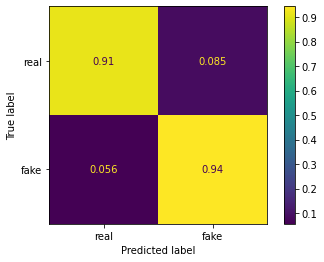

In [ ]:
# Classification report
print(classification_report(y_test, y_pred_tfidf_nb, target_names = ['real', 'fake']))
# confusion matrix
plot_confusion_matrix(pip_tfidf_nb, X_test.values, y_test, display_labels = ['real', 'fake'], normalize = 'true');

### TASK 11 - Report Analysis

Based on the results of your model, how would report/describe its performance?

The model's results are very good. The model is extremely accurate at finding true positives as well as true negatives while having a very small amount of false negatives and false positives. This means that the model is very accurate at judging when an article is real or fake news. It can make the right decision more than 90% of the time which is great. You can be sure that if you were to give the model more articles, the result you receive will almost always be correct, and that the error rate is remarkably low. False positives only occur 7% of the time and false negatives only occur 5.6% of the time. The model is just great at distinguishing real and fake news articles. With better cleaning and processing it is possible that the model can be improved, but as it stands, it does an impressive job